## 安裝套件

In [1]:
!pip install -q requests

In [2]:
!pip install feedparser

In [3]:
!pip install lxml

In [4]:
!pip install jieba

### 下載繁體字的辭典檔

In [5]:
!wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -O jieba_data/dict.txt.big

--2022-11-18 14:27:54--  https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big [following]
--2022-11-18 14:27:55--  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8583143 (8.2M) [text/plain]
Saving to: ‘jieba_data/dict.txt.big’

jieba_data/dict.txt 100%[===================>]   8.18M  3.97MB/s    in 2.1s    

2022-11-18 14:27:58 (3.97 MB/s) - ‘jieba_data/dict.txt.big’ saved [8583143/8583143]



In [6]:
!pip install wordcloud

## 解析 RSS

In [7]:
import feedparser

In [8]:
#rss_url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"

In [9]:
rss_url = "https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money"

In [10]:
newsFeed = feedparser.parse(rss_url)
newsFeed

{'bozo': False,
 'entries': [{'title': '世衛反黑箱 日後疫情藥廠須公開疫苗價格與合約',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money',
    'value': '世衛反黑箱 日後疫情藥廠須公開疫苗價格與合約'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://money.udn.com/money/story/5599/6775220'}],
   'link': 'https://money.udn.com/money/story/5599/6775220',
   'published': 'Fri, 18 Nov 2022 14:21:49 +0800',
   'published_parsed': time.struct_time(tm_year=2022, tm_mon=11, tm_mday=18, tm_hour=6, tm_min=21, tm_sec=49, tm_wday=4, tm_yday=322, tm_isdst=0),
   'summary': '據路透社所取得的資料顯示，日後應對全球衛生緊急情況時，世界衛生組織（WHO）擬強制要求大藥廠披露所有相關藥品或疫苗價格及...',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money',
    'value': '據路透社所取得的資料顯示，日後應對全球衛生緊急情況時，世界衛生組織（WHO）擬強制要求大藥廠披露所有相關藥品或疫苗價格及...'},
   'id': 'https://money.udn.com/money/story/5599/6775220',
   'guidislin

### 查看每個 entry 的 title, url 

In [11]:
i = 1
for e in newsFeed['entries']:
    title = e['title']
    link_url = e['links'][0]['href']
    print("%s, %s, %s"%(i, title, link_url))
    i = i + 1

1, 世衛反黑箱 日後疫情藥廠須公開疫苗價格與合約, https://money.udn.com/money/story/5599/6775220
2, 氣候談判陷僵局 UN秘書長：停止相互指責, https://money.udn.com/money/story/5599/6775219
3, 老牌車廠GM新事業：幫特斯拉修車, https://money.udn.com/money/story/5599/6775214
4, 赫松63遺體疑遭施酷刑 烏克蘭公布俄軍恐怖地牢, https://money.udn.com/money/story/5599/6775018
5, 高盛更看好陸韓股市 估台股明年報酬率只有1%, https://money.udn.com/money/story/5599/6775016
6, COP27／單車、水壺、談判桌：峰會無所不在的Made in China, https://money.udn.com/money/story/5599/6775007
7, 專家：北韓試射洲際飛彈 抗議美日近期頻會談, https://money.udn.com/money/story/5599/6774927
8, 加密貨幣交易所FTX破產後 客戶該何去何從, https://money.udn.com/money/story/5599/6774928
9, 飛彈炸波蘭案 澤倫斯基立場軟化稱「不是百分之百曉得」發生什麼事, https://money.udn.com/money/story/5599/6774901
10, 遭羅比尼批評 幣安趙長鵬：我們不在乎, https://money.udn.com/money/story/5599/6774866
11, 「冉起當代」展覽會新加坡登場 盼藝術走進生活, https://money.udn.com/money/story/5599/6774843
12, APEC峰會登場 張忠謀與習近平座位遙遙相對, https://money.udn.com/money/story/5599/6774829
13, 美元貶值 投資人在北京防疫政策和Fed緊縮前景之間拉扯, https://money.udn.com/money/story/5599/6774811
14, 裴洛西卸職告別演說 稱與3總統

### 解析html可以參考 https://lxml.de/lxmlhtml.html

## 開始取得文章

### 載入 library

In [12]:
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time
import random

### 使用繁體辭典

In [13]:
#指定辭典檔
jieba.set_dictionary('jieba_data/dict.txt.big')

### 設定 request header

In [14]:
#設定 request header
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
my_headers = {
    'User-Agent': user_agent,
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-Language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "accept-encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "cache-control": "no-cache",
    "Accept-Charset": "UTF8,utf-8;q=0.7,*;q=0.7"
}

### 先爬文

In [15]:
#分解動作

#爬文
each_article_text_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//*[@id="article_body"]//p')
        for a_part in article_elements:
            if type(a_part.text) is str:
                each_article_text_list.append(a_part.text.strip())
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
    all_article_text = ''.join(each_article_text_list)
all_article_text

https://money.udn.com/money/story/5599/6775220
sleep time: 10 sec
https://money.udn.com/money/story/5599/6775219
sleep time: 9 sec
https://money.udn.com/money/story/5599/6775214
sleep time: 10 sec
https://money.udn.com/money/story/5599/6775018
sleep time: 4 sec
https://money.udn.com/money/story/5599/6775016
sleep time: 3 sec
https://money.udn.com/money/story/5599/6775007
sleep time: 7 sec
https://money.udn.com/money/story/5599/6774927
sleep time: 7 sec
https://money.udn.com/money/story/5599/6774928
sleep time: 6 sec
https://money.udn.com/money/story/5599/6774901
sleep time: 4 sec
https://money.udn.com/money/story/5599/6774866
sleep time: 3 sec
https://money.udn.com/money/story/5599/6774843
sleep time: 7 sec
https://money.udn.com/money/story/5599/6774829
sleep time: 9 sec
https://money.udn.com/money/story/5599/6774811
sleep time: 4 sec
https://money.udn.com/money/story/5599/6774803
sleep time: 6 sec
https://money.udn.com/money/story/5599/6774800
sleep time: 10 sec
https://money.udn.com/

"據路透社所取得的資料顯示，日後應對全球衛生緊急情況時，世界衛生組織（WHO）擬強制要求大藥廠披露所有相關藥品或疫苗價格及與各國政府達成的採購合約。路透社報導，世衛這份協議草案仍由194個成員國協商；草案呼籲藥廠與企業有義務公開一切公共採購合約的條款，強調用於開發疫苗和治療方法的公共資金應更透明，也應加入相關規定確保由此生產的產品能平均分配給世界各國。這份國際防疫協議目的，是避免全球再次發生像COVID-19一樣具破壞性的公衛危機並改善全球因應機制，避免世界上許多最貧窮國家被遺漏。這次COVID-19疫情期間，各國政府與藥廠間達成的許多交易合約均不公開，讓藥廠幾乎不必負任何責任。世衛一名發言人表示，這份協議草案與目前進度是由一些成員國推動，「過程既公開、透明，也聽取其他利害關係人意見，包括任何感興趣的利害關係人和公眾，也能在公開諮詢中提出意見」。這份國際防疫協議尚處初步階段，在與其他更多成員國和利害關係人談判後很有可能再調整。草案在本週稍早通傳各國後，18日將在會議中公布完整內容。但對締約國或藥廠若不遵守規定會有哪些後果，協議中的交代卻很含糊；世衛沒法強迫藥廠遵守他們訂下的規則。草案文件中提出一個「同儕審查機制」，以評估各國防疫準備、公衛普及率，並促進更多國內基金用於預防和因應疫情，以利世衛調查疫情起源。國際防疫協議的協商始於今年2月，並於7月達成重要一步，即當時各國同意讓新協議具有法律約束，儘管華府早前對此有所保留。下次正式會議訂於12月舉行，最快2024年之後才有望通過。聯合國秘書長古特瑞斯今天敦促富裕國家和開發中國家，停止在氣候談判僵局中「相互指責」，並應設法達成協議，彌補因氣候變遷受創的弱勢國家。在埃及舉行為期兩週的聯合國氣候變化綱要公約第27次締約方會議（COP27）將於明天正式落幕，談判代表今晚將挑燈夜戰，尋求在具爭議的「損失和損害」問題上找到妥協方案，並防止談判破裂。古特瑞斯（Antonio Guterres）表示，已開發經濟體和新興經濟體之間「明顯存在不信任感」，又說，建立信心的最有效方式就是，在損失和損害方面達成「具有雄心且可信賴的協議」，並對弱勢國家提供金援。古特瑞斯在印尼峇里島（Bali）參加20國集團（G20）峰會之後飛回埃及，他表示：「現在不是互相指責對方的時候。指責遊戲是保證相互毀滅的好方法。 」「已沒有時間討論損失和損害融資機制的問題，

### 做分詞

In [16]:
#分詞
seg_words_list = jieba.lcut(all_article_text)
seg_words_list

Building prefix dict from /home/jovyan/work/Text_wordcloud/jieba_data/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u240ff8c1e70462be159af457c3f6d652.cache
Loading model cost 2.518 seconds.
Prefix dict has been built successfully.


['據',
 '路透社',
 '所',
 '取得',
 '的',
 '資料',
 '顯示',
 '，',
 '日後',
 '應對',
 '全球',
 '衛生',
 '緊急情況',
 '時',
 '，',
 '世界衛生組織',
 '（',
 'WHO',
 '）',
 '擬',
 '強制',
 '要求',
 '大',
 '藥廠',
 '披露',
 '所有',
 '相關',
 '藥品',
 '或',
 '疫苗',
 '價格',
 '及',
 '與',
 '各國',
 '政府',
 '達成',
 '的',
 '採購',
 '合約',
 '。',
 '路透社',
 '報導',
 '，',
 '世衛',
 '這份',
 '協議',
 '草案',
 '仍',
 '由',
 '194',
 '個',
 '成員國',
 '協商',
 '；',
 '草案',
 '呼籲',
 '藥廠',
 '與',
 '企業',
 '有',
 '義務',
 '公開',
 '一切',
 '公共',
 '採購',
 '合約',
 '的',
 '條款',
 '，',
 '強調',
 '用於',
 '開發',
 '疫苗',
 '和',
 '治療',
 '方法',
 '的',
 '公共',
 '資金',
 '應',
 '更',
 '透明',
 '，',
 '也',
 '應',
 '加入',
 '相關',
 '規定',
 '確保',
 '由此',
 '生產',
 '的',
 '產品',
 '能',
 '平均分配',
 '給',
 '世界',
 '各國',
 '。',
 '這份',
 '國際',
 '防疫',
 '協議',
 '目的',
 '，',
 '是',
 '避免',
 '全球',
 '再次發生',
 '像',
 'COVID',
 '-',
 '19',
 '一樣',
 '具',
 '破壞性',
 '的',
 '公衛',
 '危機',
 '並',
 '改善',
 '全球',
 '因應',
 '機制',
 '，',
 '避免',
 '世界',
 '上',
 '許多',
 '最',
 '貧窮',
 '國家',
 '被',
 '遺漏',
 '。',
 '這次',
 'COVID',
 '-',
 '19',
 '疫情',
 '期間',
 '，',
 '各國',
 '政府',
 '與',
 '藥廠',
 '間',


In [17]:
!ls jieba_data

dict.txt.big  mydict.txt  stop_words.txt


### 準備 stop word

In [18]:
#stop word
with open(file='jieba_data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '的',
 '了',
 '和',
 '是',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '一個',
 '沒有',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '是否',
 '(',
 ')',
 '[',
 ']',
 '《',
 '》',
 '；',
 '『',
 '』',
 '：',
 ' ',
 '’',
 '（',
 '）',
 '、',
 '」',
 '「',
 '。',
 '，',
 '在',
 '他',
 '日',
 '對',
 '']

### 準備一個利用stop word過濾後的分詞結果

In [19]:
#分詞
seg_stop_words_list = []
seg_words_list = jieba.lcut(all_article_text)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
seg_stop_words_list

['據',
 '路透社',
 '所',
 '取得',
 '資料',
 '顯示',
 '日後',
 '應對',
 '全球',
 '衛生',
 '緊急情況',
 '時',
 '世界衛生組織',
 'WHO',
 '擬',
 '強制',
 '要求',
 '大',
 '藥廠',
 '披露',
 '所有',
 '相關',
 '藥品',
 '疫苗',
 '價格',
 '各國',
 '政府',
 '達成',
 '採購',
 '合約',
 '路透社',
 '報導',
 '世衛',
 '這份',
 '協議',
 '草案',
 '仍',
 '由',
 '194',
 '個',
 '成員國',
 '協商',
 '草案',
 '呼籲',
 '藥廠',
 '企業',
 '有',
 '義務',
 '公開',
 '一切',
 '公共',
 '採購',
 '合約',
 '條款',
 '強調',
 '用於',
 '開發',
 '疫苗',
 '治療',
 '方法',
 '公共',
 '資金',
 '應',
 '更',
 '透明',
 '也',
 '應',
 '加入',
 '相關',
 '規定',
 '確保',
 '由此',
 '生產',
 '產品',
 '能',
 '平均分配',
 '給',
 '世界',
 '各國',
 '這份',
 '國際',
 '防疫',
 '協議',
 '目的',
 '避免',
 '全球',
 '再次發生',
 '像',
 'COVID',
 '-',
 '19',
 '一樣',
 '具',
 '破壞性',
 '公衛',
 '危機',
 '並',
 '改善',
 '全球',
 '因應',
 '機制',
 '避免',
 '世界',
 '上',
 '許多',
 '最',
 '貧窮',
 '國家',
 '被',
 '遺漏',
 '這次',
 'COVID',
 '-',
 '19',
 '疫情',
 '期間',
 '各國',
 '政府',
 '藥廠',
 '間',
 '達成',
 '許多',
 '交易',
 '合約',
 '均',
 '不',
 '公開',
 '讓',
 '藥廠',
 '幾乎',
 '不必',
 '負',
 '任何',
 '責任',
 '世衛',
 '一名',
 '發言人',
 '表示',
 '這份',
 '協議',
 '草案',
 '目前',
 '進度',
 '由'

### 載入繪圖相關的 library

In [20]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())

/opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


### 繪製文字雲 ( wordcloud.generate )

In [21]:
# wordcloud.generate 參數是吃文字內容，以空白為文字區隔
seg_words = ' '.join(seg_words_list)
#seg_words

### 繪製文字雲 ( wordcloud.generate_from_frequencies )

In [22]:
# https://docs.python.org/zh-tw/3/library/collections.html
# 準備一個沒有經過stop word 處理的 counter
from collections import Counter
seg_counter = Counter(seg_words_list)
seg_counter

Counter({'據': 5,
         '路透社': 8,
         '所': 6,
         '取得': 3,
         '的': 312,
         '資料': 1,
         '顯示': 7,
         '，': 569,
         '日後': 1,
         '應對': 4,
         '全球': 9,
         '衛生': 1,
         '緊急情況': 1,
         '時': 18,
         '世界衛生組織': 1,
         '（': 89,
         'WHO': 1,
         '）': 89,
         '擬': 1,
         '強制': 1,
         '要求': 5,
         '大': 6,
         '藥廠': 6,
         '披露': 2,
         '所有': 6,
         '相關': 8,
         '藥品': 1,
         '或': 11,
         '疫苗': 2,
         '價格': 5,
         '及': 8,
         '與': 34,
         '各國': 9,
         '政府': 3,
         '達成': 6,
         '採購': 2,
         '合約': 3,
         '。': 256,
         '報導': 16,
         '世衛': 4,
         '這份': 6,
         '協議': 8,
         '草案': 5,
         '仍': 10,
         '由': 4,
         '194': 1,
         '個': 9,
         '成員國': 3,
         '協商': 2,
         '；': 8,
         '呼籲': 1,
         '企業': 3,
         '有': 30,
         '義務': 1,
         '公開': 5,
    

In [23]:
# 準備一個有經過stop word 處理的 counter
from collections import Counter
seg_stop_counter = Counter(seg_stop_words_list)
#seg_stop_counter

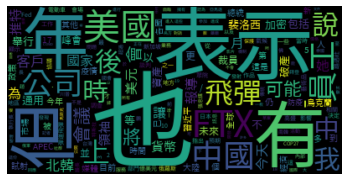

In [28]:
#有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_stop_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("result.png")
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>